In [24]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import chi2_contingency

# 고해상도 디스플레이 설정
%config InlineBackend.figure_format = 'retina'
# 폰트를 'Malgun Gothic'으로 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 마이너스 부호 깨짐 현상 해결
plt.rcParams["axes.unicode_minus"] = False

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# Seaborn 시각화 패키지 임포트
import seaborn as sns
sns.set(font="Malgun Gothic",             # 폰트 설정
        rc={"axes.unicode_minus":False},  # 마이너스 부호 깨짐 현상 방지
        style="white")                    # 테마

In [26]:
df = pd.read_excel('산악지역이동통신무선국_분석용.xlsx')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14406 entries, 0 to 14405
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구분        14406 non-null  object 
 1   이름        14406 non-null  object 
 2   허가번호      14406 non-null  int64  
 3   허가연도      14406 non-null  int64  
 4   시설자명      14362 non-null  object 
 5   용도        14406 non-null  object 
 6   장치개수      12081 non-null  float64
 7   주파수(MHz)  14406 non-null  float64
 8   출력(W)     12085 non-null  float64
 9   안테나설치형태   13326 non-null  object 
 10  대표이득      14406 non-null  float64
 11  해발고       14406 non-null  float64
 12  높이        14406 non-null  float64
 13  위도        14406 non-null  float64
 14  경도        14406 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 1.6+ MB


# 데이터 상관계수 산출 및 시각화

In [43]:
tmp = df.loc[:, ['허가연도', '장치개수', '주파수(MHz)', '출력(W)', '대표이득', '해발고', '높이']]

In [47]:
cor = tmp.corr()
cor

,허가연도,장치개수,주파수(MHz),출력(W),대표이득,해발고,높이
허가연도,1.000000,0.157683,0.374966,0.283554,0.213209,0.040530,-0.057085
장치개수,0.157683,1.000000,-0.146442,0.209033,0.040672,0.005642,-0.008148
주파수(MHz),0.374966,-0.146442,1.000000,-0.058325,0.518956,-0.030027,0.010560
출력(W),0.283554,0.209033,-0.058325,1.000000,0.183776,0.008343,0.020623
대표이득,0.213209,0.040672,0.518956,0.183776,1.000000,0.031709,0.112543
해발고,0.040530,0.005642,-0.030027,0.008343,0.031709,1.000000,0.035271
높이,-0.057085,-0.008148,0.010560,0.020623,0.112543,0.035271,1.000000


In [61]:
# 양의 상관관계가 강한 변수들 (상관 계수 > 0.5)
positive_corr = cor[cor > 0.5]

# 음의 상관관계가 강한 변수들 (상관 계수 < -0.5)
negative_corr = cor[cor < -0.5]

# 양의 상관관계 강한 변수들 출력
print("양의 상관관계가 강한 변수들 (상관 계수 > 0.5):")
for col in positive_corr.columns:
    for row in positive_corr.index:
        if col != row and pd.notna(positive_corr.loc[row, col]):
            print(f"{row}와 {col}은 양의 상관관계가 강합니다. (상관 계수: {positive_corr.loc[row, col]:.2f})")

# 음의 상관관계 강한 변수들 출력
print("\n음의 상관관계가 강한 변수들 (상관 계수 < -0.5):")
for col in negative_corr.columns:
    for row in negative_corr.index:
        if col != row and pd.notna(negative_corr.loc[row, col]):
            print(f"{row}와 {col}은 음의 상관관계가 강합니다. (상관 계수: {negative_corr.loc[row, col]:.2f})")

양의 상관관계가 강한 변수들 (상관 계수 > 0.5):
대표이득와 주파수(MHz)은 양의 상관관계가 강합니다. (상관 계수: 0.52)
주파수(MHz)와 대표이득은 양의 상관관계가 강합니다. (상관 계수: 0.52)

음의 상관관계가 강한 변수들 (상관 계수 < -0.5):


In [51]:
# 마스킹
mask = np.triu(np.ones_like(cor, dtype=np.bool_))

# 절대값 적용

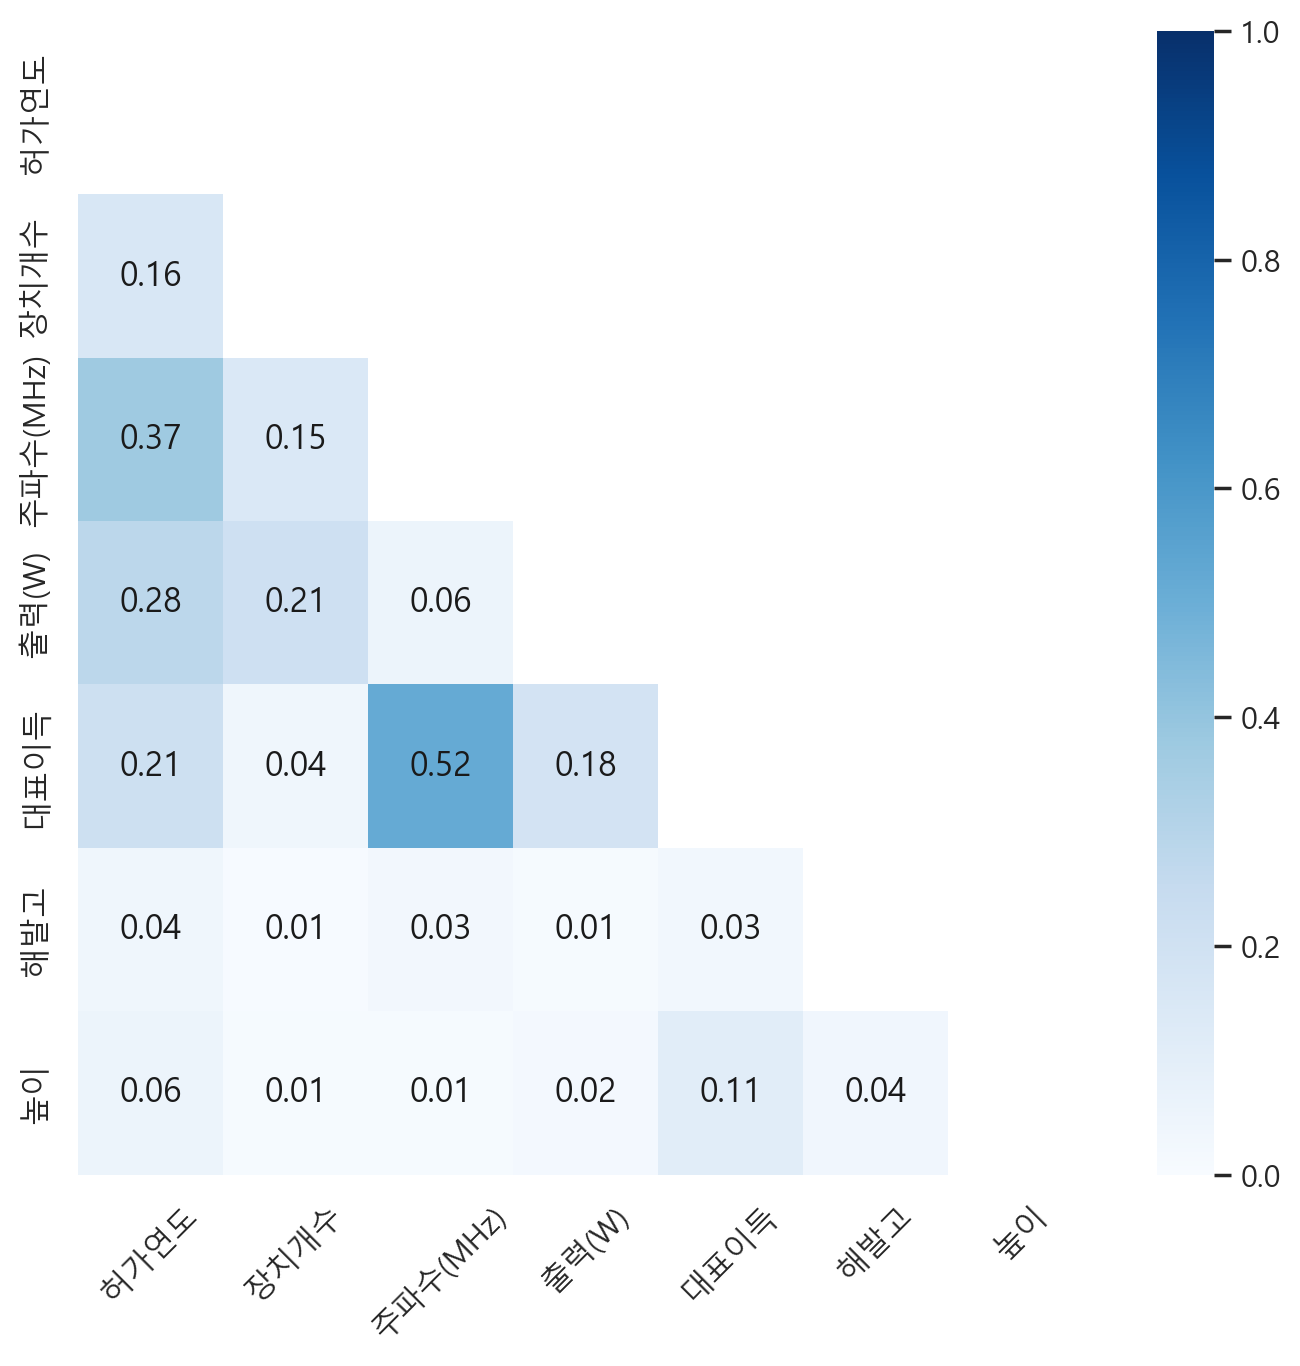

In [57]:
# 그림 사이즈 설정
plt.figure(figsize = (7,7))
# heatmap
sns.heatmap(abs(cor),                     # 데이터
            cmap="Blues",            # 색설정
            annot = True,            # 수치 표시
            fmt=".2f",             # 소수점 두 자리까지 나타내기
            annot_kws={'color':"k"}, # 글자 색 설정
            mask=mask,               # 마스킹
            vmin=0, vmax = 1)        # 최대 최소값
# X축 45도 회전
plt.xticks(rotation = 45)
plt.tight_layout()
# png파일로 저장
plt.savefig('변수간상관계수.png', dpi = 400)
plt.show()

# 절대값 미적용

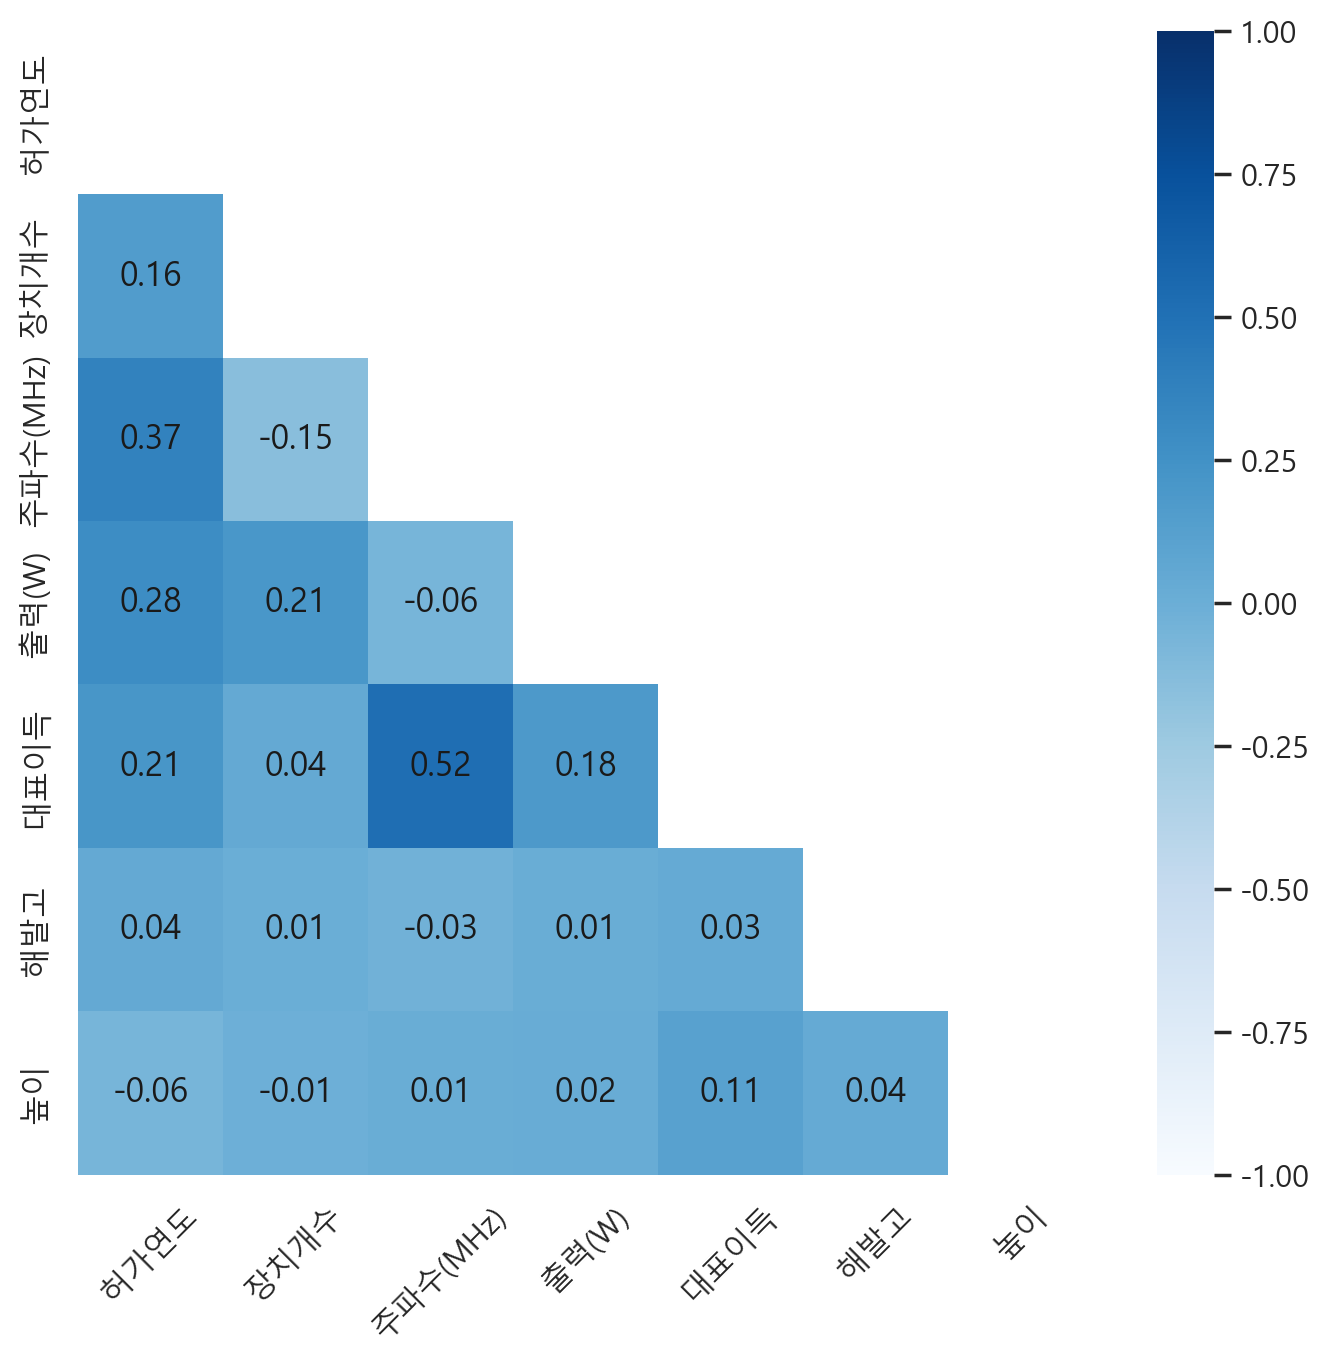

In [55]:
# 그림 사이즈 설정
plt.figure(figsize = (7,7))
# heatmap
sns.heatmap(cor,                     # 데이터
            cmap="Blues",            # 색설정
            annot = True,            # 수치 표시
            fmt=".2f",             # 소수점 두 자리까지 나타내기
            annot_kws={'color':"k"}, # 글자 색 설정
            mask=mask,               # 마스킹
            vmin=0, vmax = 1)        # 최대 최소값
# X축 45도 회전
plt.xticks(rotation = 45)
plt.tight_layout()
# png파일로 저장
#plt.savefig('heatmap.png', dpi = 400)
plt.show()